<h1> <center> Tree-based Direct Sampling (TDS) on Antarctica topography modeling - Training Phase to build tree </center> </h1> 
<p>***Author***:  Chen Zuo and David Zhen Yin   
<p>***Contact***: [chenzuo789@outlook.com](mailto:chenzuo789@outlook.com); [yinzhen@stanford.edu](mailto:yinzhen@stanford.edu) 
<p>***Date***:    Aug. 22, 2019

    

# Step 1. load functions

In [1]:
# import necessary package
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from src.build_TI_tree import build_TI_tree
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Step 2. Set input paramters

In [2]:
# artificially eliminate the occean area on the top right corner
# the area whose elevation below this value is not trained
project_name = 'Antarctica'
ArtificalThreshold = -1000

# set the radius of template the size of template is 2*radius+1
template_radius_x = 8
template_radius_y = 8

TreeHeight_max = 9

In [3]:
# the current work simulate an area
Realization_Height = 601    # these four parameter come from the user
Realization_Width = 601
knownUpbound = 3346
knownBelowbound = -5000    # the minimum value of known elevation

Realization_row = np.loadtxt('./TI_input/Antarctica_ds_data4.txt',skiprows=3)
Realization_2D = Realization_row.reshape(Realization_Height,Realization_Width)

new height is 1202
new width is 1202
the dimension of Training Image (TI) is (1202, 1202)


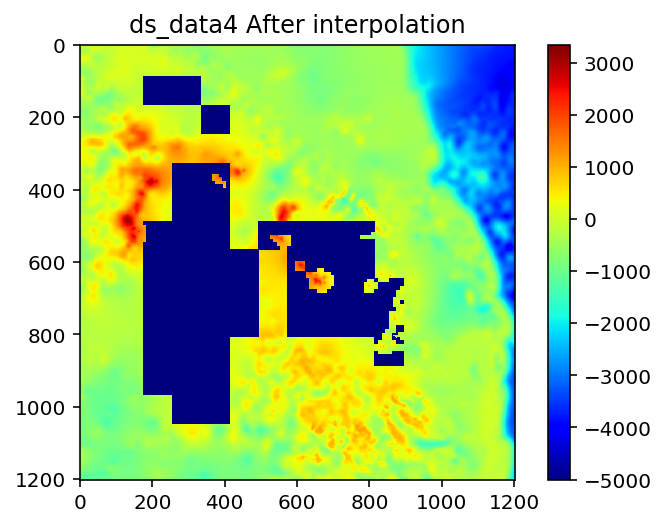

In [4]:
# refine training image to increase resolution
ZoomCoefficient = 2

Realization_Height = int(Realization_Height*ZoomCoefficient)
Realization_Width = int(Realization_Width*ZoomCoefficient)
print('new height is '+str(Realization_Height))
print('new width is '+str(Realization_Width))

coordinate_y = np.linspace(0,Realization_Height-ZoomCoefficient,int(Realization_Height/ZoomCoefficient))
coordinate_x = np.linspace(0,Realization_Width-ZoomCoefficient,int(Realization_Width/ZoomCoefficient))
coordinate_y_new = np.linspace(0,Realization_Height-1,Realization_Height)
coordinate_x_new = np.linspace(0,Realization_Width-1,Realization_Width)

interpolationFunction = interpolate.interp2d(coordinate_x, coordinate_y, Realization_2D, kind='linear')
TI = interpolationFunction(coordinate_x_new, coordinate_y_new)
TI_row = TI.reshape(Realization_Height*Realization_Width)
print('the dimension of Training Image (TI) is '+str(TI.shape))
# print('the size of TI is '+str(TI_row.shape))

plt.imshow(TI,cmap = 'jet', vmin=knownBelowbound, vmax=knownUpbound)
plt.title('ds_data4 After interpolation')
plt.colorbar()
plt.show()

#output the realization used in Java program
file = open("./../TDS_SimulationPhase2.0/clusterTreeSimulation/z_Antarctica_TI_refined.txt","w")
for value in TI_row:
    file.write(str(value)+'\n')
file.close()

# Step 3. runing Training Phase to construct tree using training image

mission begins !
2019-09-19 20:39:55
The amount of pattern is 881351
The size of pattern is 289
running PCA
The reduced dimension is 1


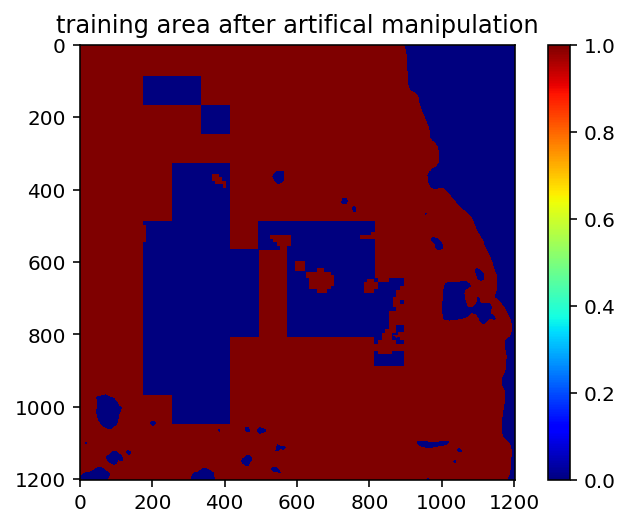

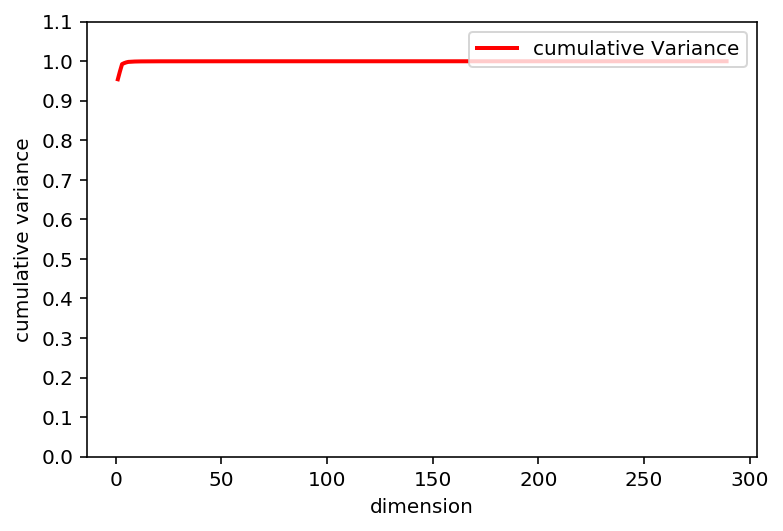

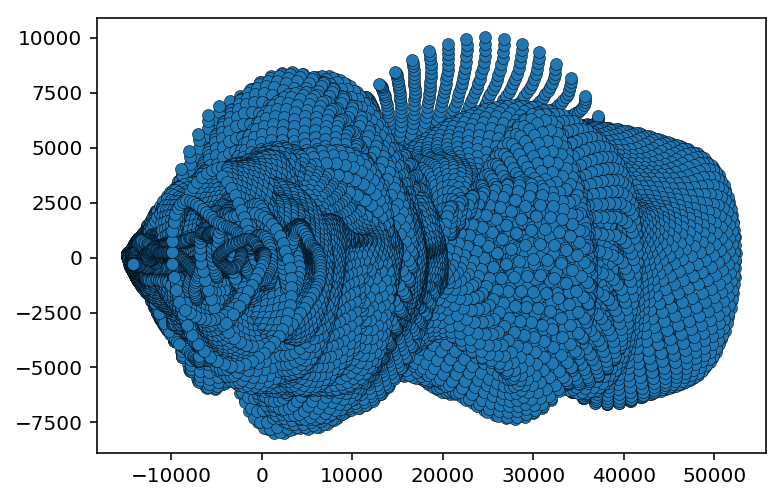

the maximum inner radius is 52378.514822515426
height: 1
cluster amount:2
the average size: 440675.5
the max size: 627422
the min size: 253929.0


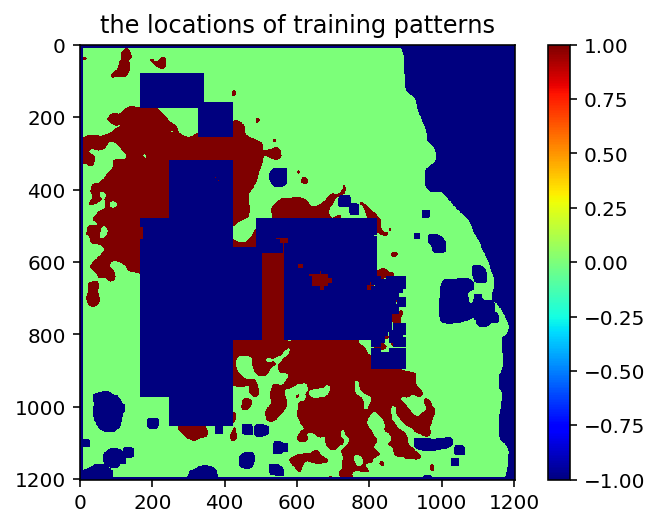

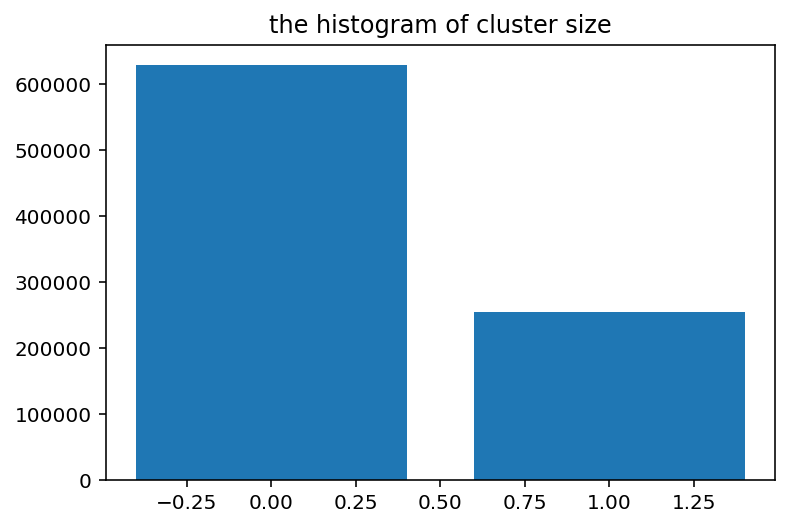

height: 2
cluster amount:4
the average size: 220337.75
the max size: 327554
the min size: 33441.0


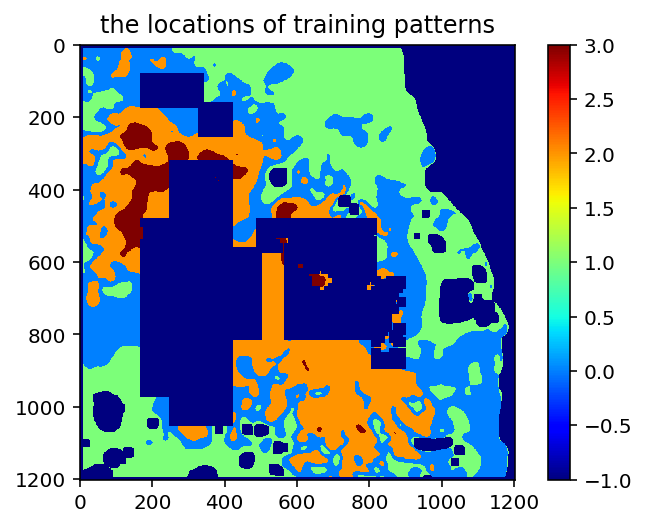

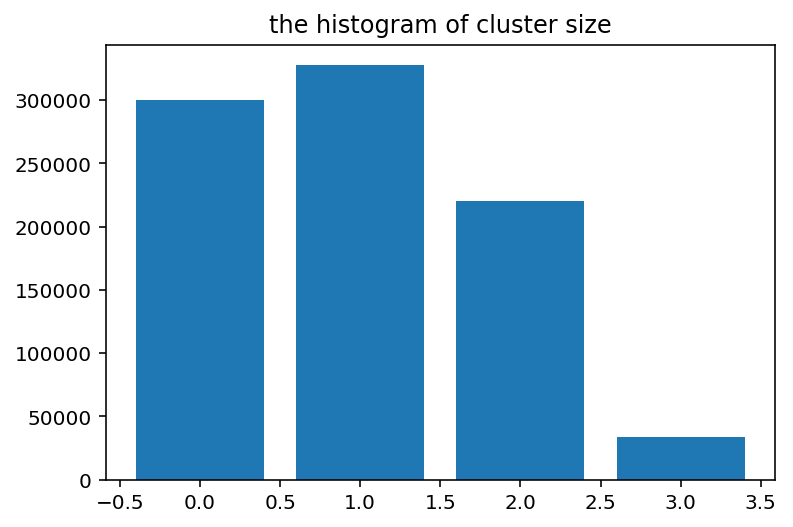

height: 3
cluster amount:8
the average size: 110168.875
the max size: 215673
the min size: 10481.0


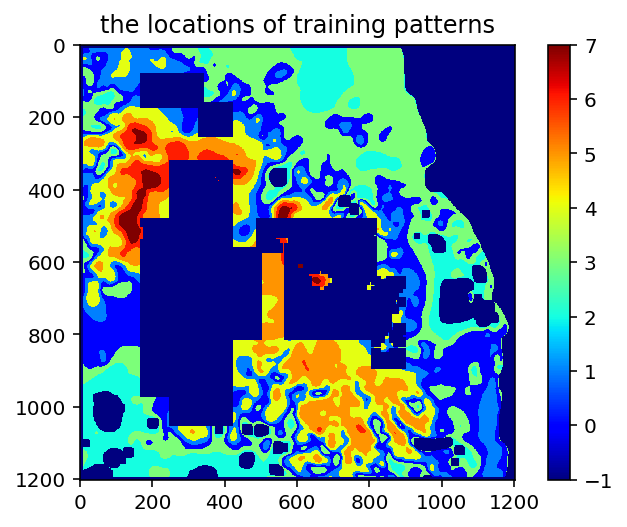

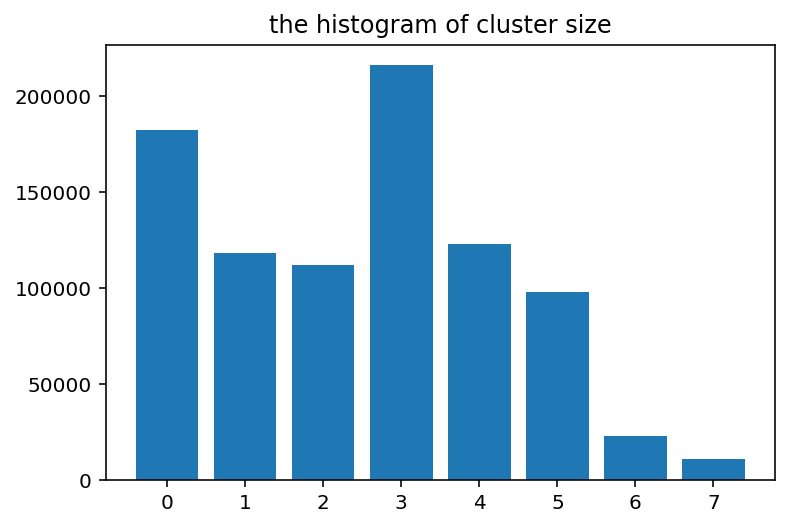

height: 4
cluster amount:16
the average size: 55084.4375
the max size: 115404
the min size: 3254.0


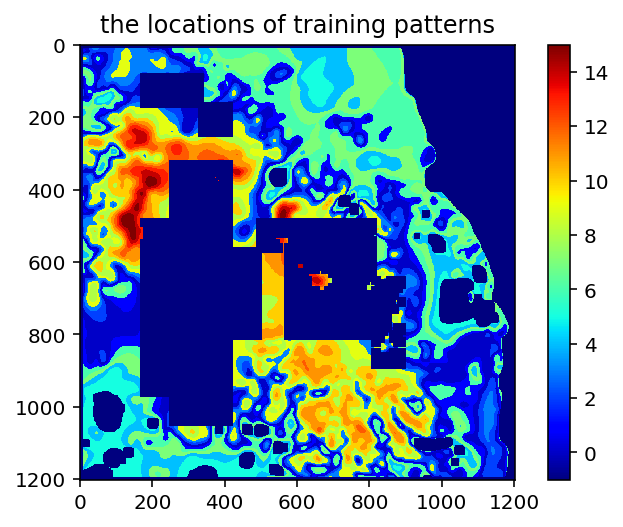

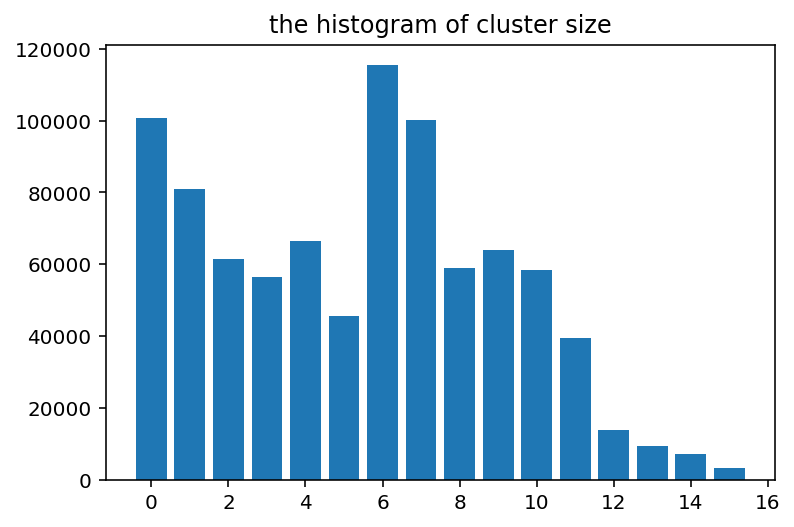

height: 5
cluster amount:32
the average size: 27542.21875
the max size: 58740
the min size: 880.0


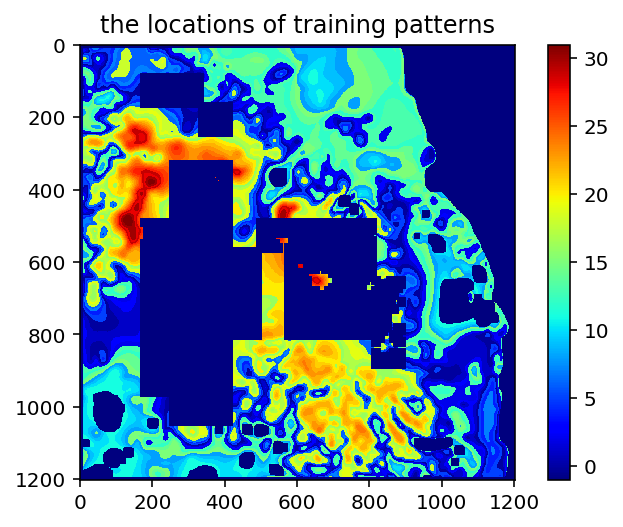

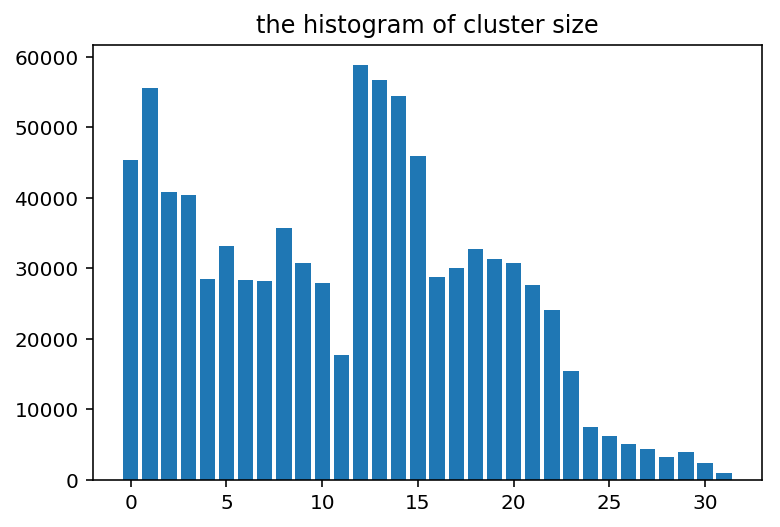

height: 6
cluster amount:64
the average size: 13771.109375
the max size: 30766
the min size: 296.0


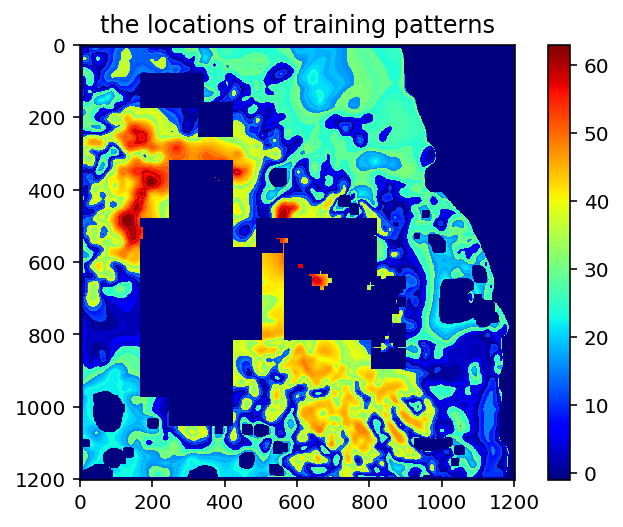

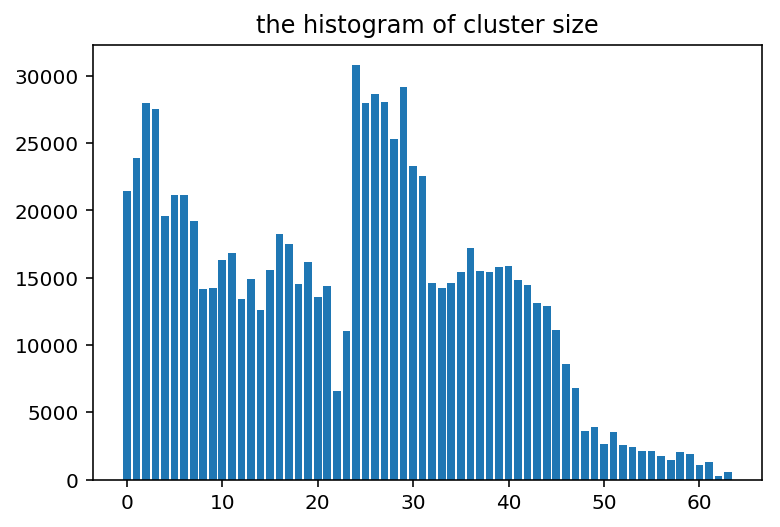

height: 7
cluster amount:128
the average size: 6885.5546875
the max size: 15554
the min size: 144.0


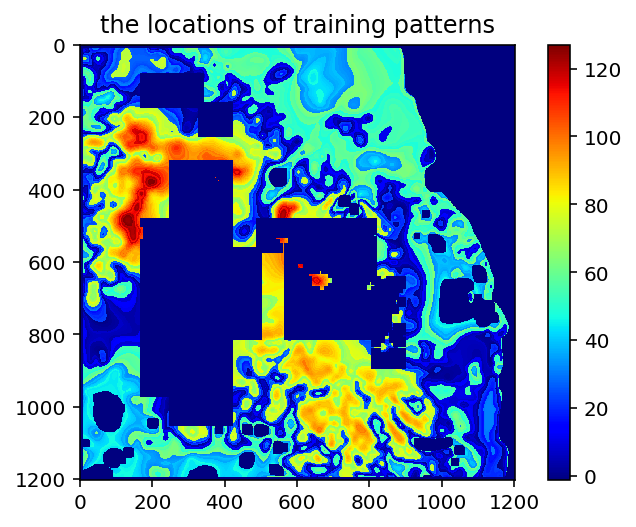

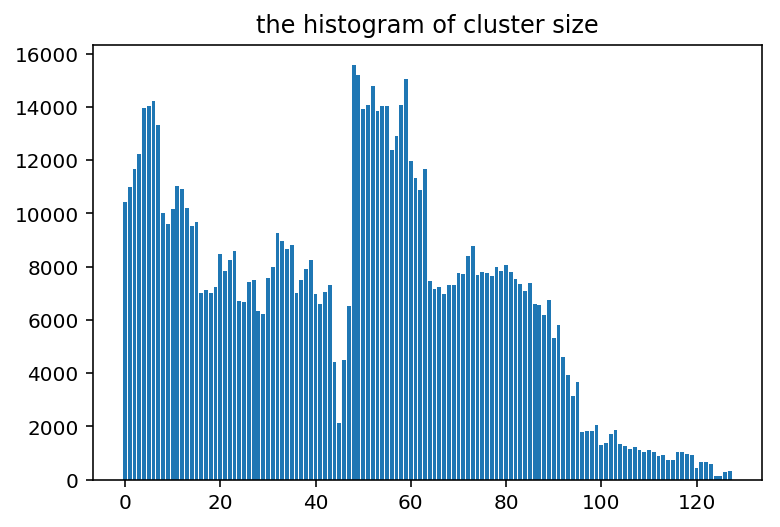

height: 8
cluster amount:256
the average size: 3442.77734375
the max size: 8168
the min size: 70.0


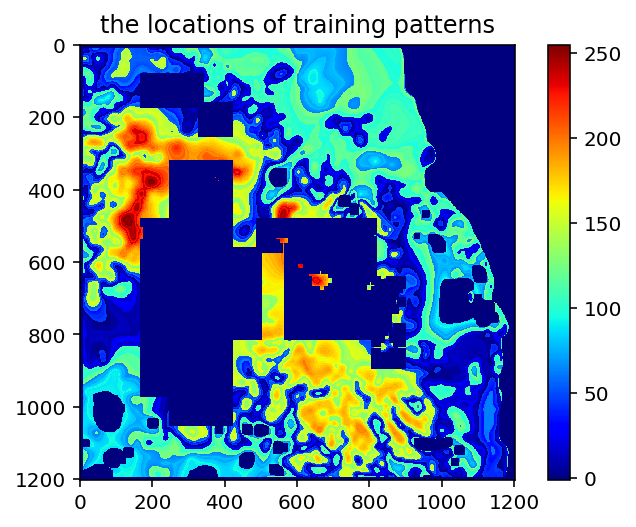

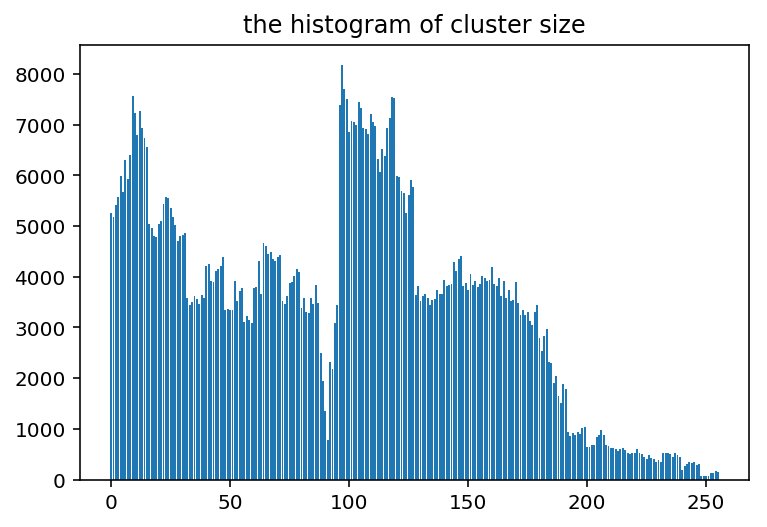

height: 9
cluster amount:512
the average size: 1721.388671875
the max size: 4107
the min size: 32.0


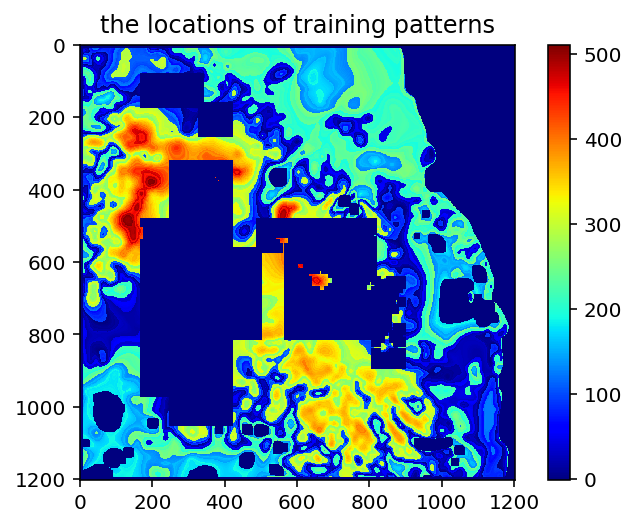

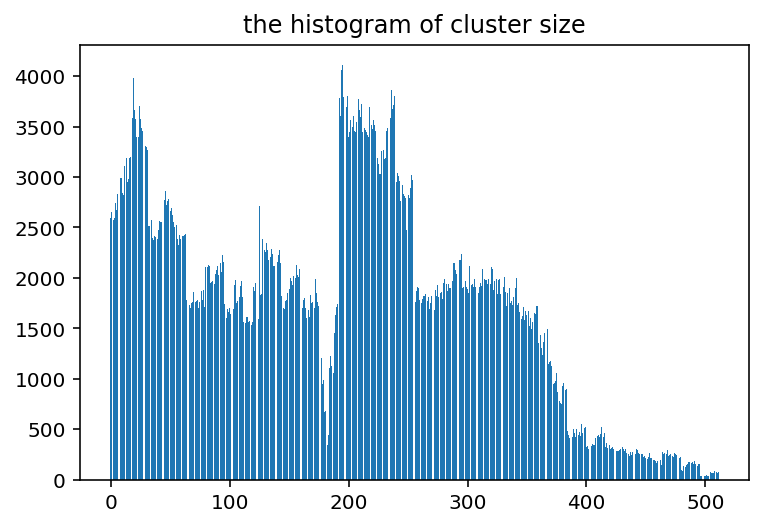

the cluster tree construction costs 131.00280284881592 seconds
the cluster tree construction and file outputs take 134.18362069129944 seconds
1 Read training image; 2 the cluster tree construction; 3 file outputs. All missions consume 134.2654323577881 seconds


In [5]:
build_TI_tree(project_name, TI, TI_row, Realization_Height, Realization_Width, ArtificalThreshold, \
               template_radius_x, template_radius_y, TreeHeight_max, knownUpbound, knownBelowbound)